# Computational Methods in Physics (FIS810)
# UFPE - PPGFIS

## Week 4 - Chaos

In [74]:
# Libraries

import numpy as np
import matplotlib.pyplot as plt

# Plotting style

plt.style.use('science')
plt.rcParams['figure.figsize'] = (8,6)
plt.rcParams['font.size'] = 15
plt.rcParams['text.usetex'] = True

### 1) $x_n$ as a function of $x_0$

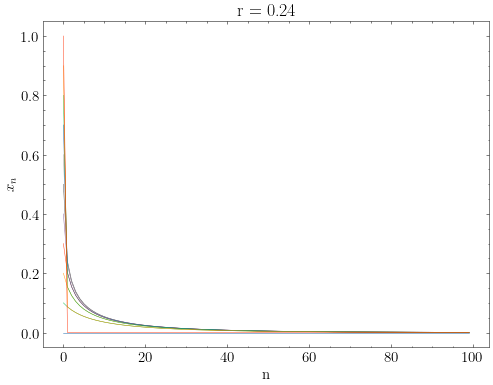

In [75]:
r = 0.24
N = 1000 # Time
m = 11 # Starting points 

x = np.zeros((N,m))
x[0] = np.linspace(0, 1, m)

for i in range(N-1):
    x[i+1] = 4.0*r*x[i]*(1-x[i])

plt.plot(x[:100], linewidth=0.5 , alpha=0.9)
plt.xlabel('n')
plt.ylabel('$x_n$')
plt.title(f'r = {r}')
plt.show()

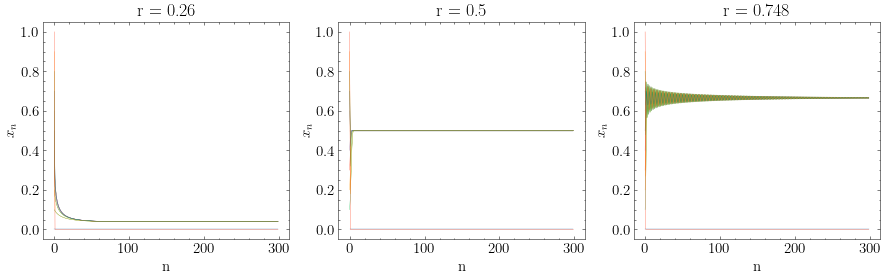

In [76]:
N = 1000 # Time
m = 11 # Starting points 

r_list = [0.26, 0.5, 0.748]

plt.figure(figsize=(15,4))

for idx, r in enumerate(r_list): 
    x = np.zeros((N,m))
    x[0] = np.linspace(0, 1, m)

    for i in range(N-1):
        x[i+1] = 4.0*r*x[i]*(1-x[i])

    plt.subplot(1, 3, idx+1)
    plt.plot(x[:300], linewidth=0.3, alpha=0.9)
    plt.xlabel('n')
    plt.ylabel('$x_n$')
    plt.title(f'r = {r}')

plt.show()

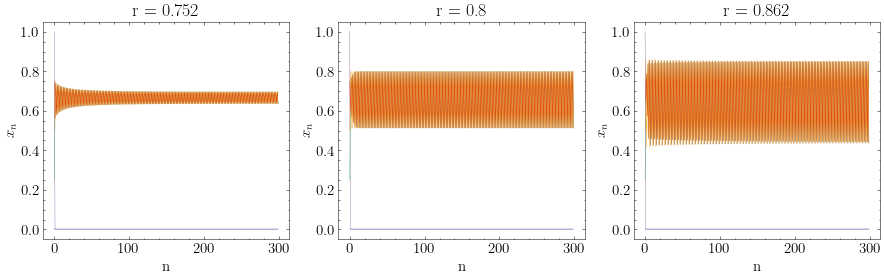

In [77]:
# r = 0.752, 0.8, 0.862

N = 3000
m = 5

r_list = [0.752, 0.8, 0.862]

plt.figure(figsize=(15,4))

for idx, r in enumerate(r_list): 
    x = np.zeros((N,m))
    x[0] = np.linspace(0, 1, m)

    for i in range(N-1):
        x[i+1] = 4.0*r*x[i]*(1-x[i])

    plt.subplot(1, 3, idx+1)
    plt.plot(x[:300], linewidth=0.4, alpha=0.9)
    plt.xlabel('n')
    plt.ylabel('$x_n$')
    plt.title(f'r = {r}')

plt.show()

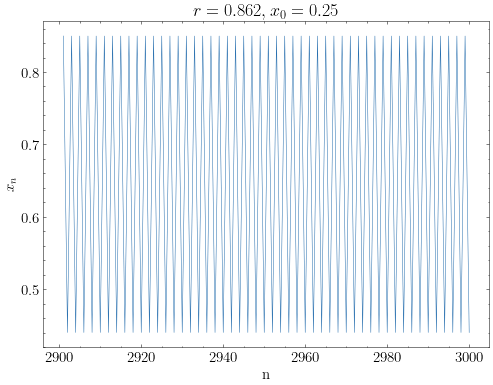

In [78]:
# Oscillations

plt.plot(np.arange(2901, 3001, 1), x[2900:3000, 1], linewidth=0.5, alpha=0.9)
plt.title(f'$r = {r}, x_0 = {x[0,1]}$')
plt.xlabel('n')
plt.ylabel('$x_n$')
plt.show()

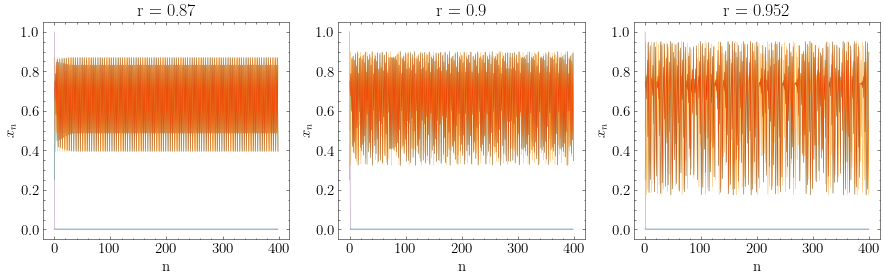

In [79]:
# r = 0.87, 0.9, 0.952

N = 3000
m = 5

r_list = [0.87, 0.9, 0.952]

plt.figure(figsize=(15,4))

for idx, r in enumerate(r_list): 
    x = np.zeros((N,m))
    x[0] = np.linspace(0, 1, m)

    for i in range(N-1):
        x[i+1] = 4.0*r*x[i]*(1-x[i])

    plt.subplot(1, 3, idx+1)
    plt.plot(x[:400], linewidth=0.4, alpha=0.9)
    plt.xlabel('n')
    plt.ylabel('$x_n$')
    plt.title(f'r = {r}')

plt.show()

### 2) $x_n$ as a function of r 

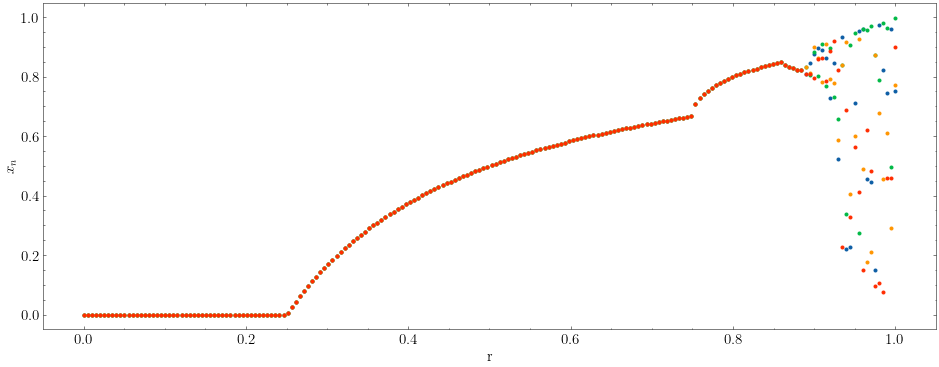

In [81]:
# Last x as a function of r for different seeds

N = 3000
xn_list = []
r_list = np.linspace(0, 1, 200)
x_list = np.linspace(0.25, 0.5, 100)

for x in x_list:
    xn = []
    for r in r_list:
        x_last = x
        for i in range(N):
            x_new = 4.0*r*x_last*(1.0-x_last)
            x_last = x_new
        xn.append(x_last)
    xn_list.append(xn)
        

plt.figure(figsize=(16,6))        

for i in range(100):
    plt.plot(r_list, xn_list[i], marker='.', ls='')

plt.xlabel('r')
plt.ylabel('$x_n$')
plt.show()

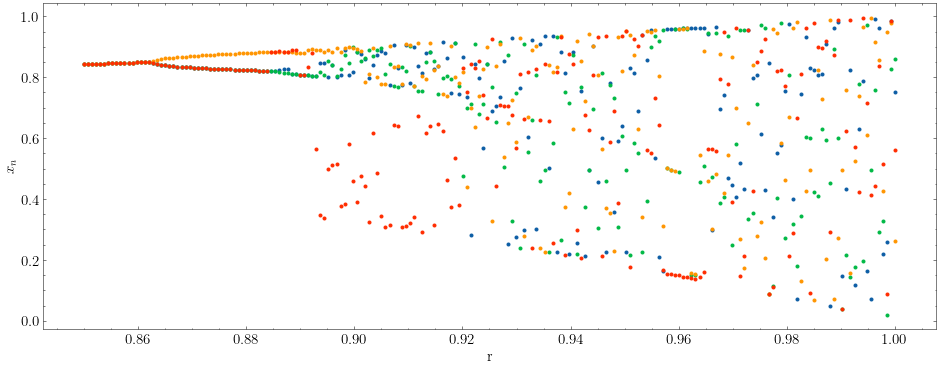

In [68]:
# Restricting r to see the doubling of the period

N = 3000
xn_list = []
r_list = np.linspace(0.85, 1, 200)
x_list = [0.25, 0.26, 0.27, 0.28]

for x in x_list:
    xn = []
    for r in r_list:
        x_last = x
        for i in range(N):
            x_new = 4.0*r*x_last*(1.0-x_last)
            x_last = x_new
        xn.append(x_last)
    xn_list.append(xn)
        
plt.figure(figsize=(16,6)) 
plt.plot(r_list, xn_list[0], marker='.', ls='')
plt.plot(r_list, xn_list[1], marker='.', ls='')
plt.plot(r_list, xn_list[2], marker='.', ls='')
plt.plot(r_list, xn_list[3], marker='.', ls='')
plt.xlabel('r')
plt.ylabel('$x_n$')
plt.show()

## Characterizing chaotic systems

In [69]:
r = 0.91
N = 5000
m = 2 

x = np.zeros((N,m))
x[0] = [0.5, 0.5001]

for i in range(N-1):
    x[i+1] = 4.0*r*x[i]*(1-x[i])

In [70]:
# Lyapunov coefficient

f = 4*r*(1-2*x[:,0])

n_max = N-3000

lambd = (1/n_max)*np.sum(np.log(np.abs(f[1000:])))
print(lambd)

0.4609592280659059


In [71]:
def lyap(x):
    N = len(x)
    nt = 3000
    n_max = N-nt
    f = 4*r*(1-2*x[nt:])
    return (1/n_max)*np.sum(np.log(np.abs(f)))

In [72]:
lyap(x)

0.46881142895296624

<ipython-input-71-56adf73b3633>:6: RuntimeWarning: divide by zero encountered in log
  return (1/n_max)*np.sum(np.log(np.abs(f)))


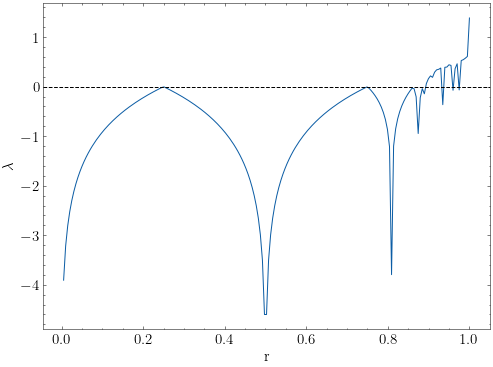

In [73]:
N = 5000

x = np.zeros(N)
x[0] = 0.5

r_values = np.linspace(0, 1, 200)
lyap_values = []

for r in r_values:
    for i in range(N-1):
        x[i+1] = 4.0*r*x[i]*(1-x[i])
    lyap_values.append(lyap(x))
    

plt.plot(r_values, lyap_values)
plt.axhline(ls='--', c='k')
plt.xlabel('r')
plt.ylabel('$\lambda$')
plt.show()
    